## 다중 분류 - Wine 데이터

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2023
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
tf.__version__

'2.14.0'

- 데이터 전처리

In [5]:
from sklearn.datasets import load_wine
wine = load_wine()
wine.data.shape

(178, 13)

In [6]:
# X 데이터는 표준화
from sklearn.preprocessing import StandardScaler
wine_std = StandardScaler().fit_transform(wine.data)

In [7]:
# y 데이터
np.unique(wine.target, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48], dtype=int64))

In [8]:
# y의 값이 3가지 이상일 경우에는 반드시 One-hot encoding을 해주어야 함
from tensorflow.keras.utils import to_categorical
Y = to_categorical(wine.target)
Y.shape, Y[:5]

((178, 3),
 array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]], dtype=float32))

In [9]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    wine_std, Y, stratify=Y, test_size=0.2, random_state=seed
)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((142, 13), (36, 13), (142, 3), (36, 3))

- 모델 정의/설정/학습/평가

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model = Sequential([
    Dense(30, input_dim=13, activation='relu'),
    Dense(12, activation='relu'),
    Dense(3, activation='softmax')      # 노드수는 y의 종류 갯수, 활성화함수는 softmax
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 3)                 39        
                                                                 
Total params: 831 (3.25 KB)
Trainable params: 831 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# 다중 분류시 손실 함수는 categorical_crossentropy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# 학습
hist = model.fit(X_train, Y_train, validation_split=0.2,
                 epochs=100, batch_size=100, verbose=0)

In [14]:
# 평가
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.0906 - accuracy: 1.0000


[0.090573750436306, 1.0]

In [15]:
# 예측
pred = model.predict(X_test)
pred[:5]

2/2 [==============================] - 0s 3ms/step


array([[2.4482124e-02, 3.5808634e-02, 9.3970925e-01],
       [9.9983203e-01, 9.2517679e-05, 7.5387397e-05],
       [1.6647533e-02, 9.7957408e-01, 3.7783305e-03],
       [9.9919254e-01, 5.2024302e-04, 2.8723700e-04],
       [4.8455250e-02, 9.5060921e-01, 9.3562325e-04]], dtype=float32)

- 학습과정 시각화

In [16]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

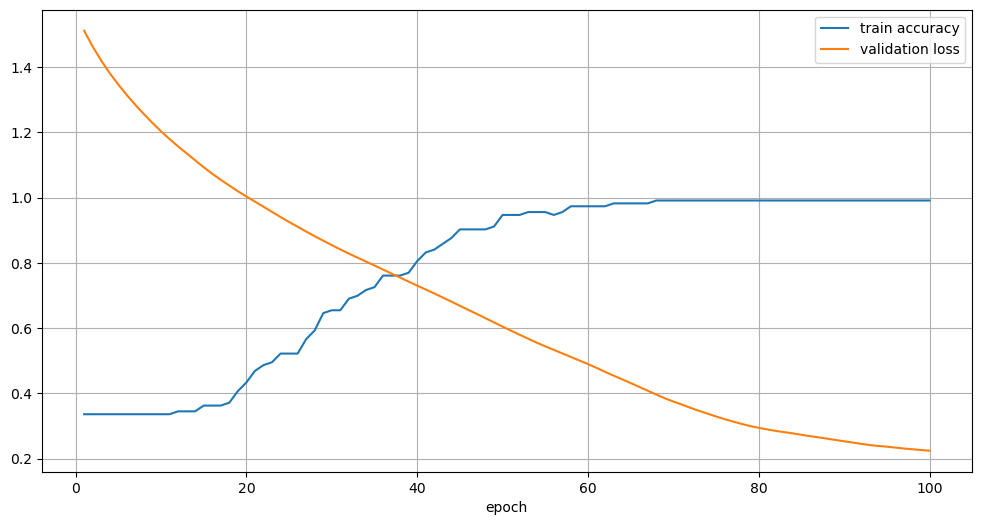

In [17]:
plt.figure(figsize=(12,6))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('epoch')
plt.show()